In [3]:
import os
pathtogs='C:\\Program Files\\gs\\gs9.24\\bin'
os.environ['PATH']+=os.pathsep+pathtogs

### Objective 1

In [11]:
import nltk
from collections import Counter

def GetPOSTags(string):
    tokens=nltk.word_tokenize(string)
    pos_tags=nltk.pos_tag(tokens)
    return pos_tags

def GetNMostFrequentNouns(string,n):
    POSTags=GetPOSTags(string)
    allForms=['NN','NNP','NNS','NNPS']
    count=0
    words=[]
    for word,tag in POSTags:
        if tag in allForms:
            words.append(word.lower())
    c=Counter(words)
    return list(dict(c.most_common(n)).keys())

def GetNMostFrequentVerbs(string,n):
    POSTags=GetPOSTags(string)
    allForms=['VB','VBP','VBZ','VBG','VBD','VBN']
    count=0
    words=[]
    for word,tag in POSTags:
        if tag in allForms:
            words.append(word.lower())
    c=Counter(words)
    return list(dict(c.most_common(n)).keys())

def GetNMostFrequentDelimiters(string,n):
    POSTags=GetPOSTags(string)
    allForms=['DT']
    count=0
    words=[]
    for word,tag in POSTags:
        if tag in allForms:
            words.append(word.lower())
    c=Counter(words)
    return list(dict(c.most_common(n)).keys())


def GetNMostFrequentPrepositions(string,n):
    POSTags=GetPOSTags(string)
    allForms=['IN']
    count=0
    words=[]
    for word,tag in POSTags:
        if tag in allForms:
            words.append(word.lower())
    c=Counter(words)
    return list(dict(c.most_common(n)).keys())



In [17]:
file=open("FIFAWorldCup2018.txt",'r')
content=file.read()
content

'2018 FIFA World CUP is an international tournament where all teams compete religously and they showcase beautiful talent. It took place in Russia from 14 June to 15 July 2018. It was the first World Cup to be held in Eastern Europe, and the 11th time that it had been held in Europe. At an estimated cost of over 14.2 billion, it was the most expensive World Cup. It was also the first World Cup to use the video assistant referee  system. \nThe finals involved 32 teams, of which 31 came through qualifying competitions, while the host nation qualified automatically. Of the 32 teams, 20 had also appeared in the previous tournament in 2014, while both Iceland and Panama made their first appearances at a FIFA World Cup. A total of 64 matches were played in 12 venues across 11 cities. \nThe final took place on 15 July at the Luzhniki Stadium in Moscow, between France and Croatia. France won the match 4–2 to claim their second World Cup title, marking the fourth consecutive title won by a Euro

In [16]:
#Run all the function on the file “FIFAWorldCup2018.docx” and print the results.
#reading the file
file=open("FIFAWorldCup2018.txt",'r')
content=file.read()
file.close()

#5 most frequent noun
print ("5 Most Frequent Nouns:",GetNMostFrequentNouns(content,5))


#5 most frequent verbs
print ("5 Most Frequent Verbs:",GetNMostFrequentVerbs(content,5))



#4 most frequent delimiters
print ("4 Most Frequent Nouns:",GetNMostFrequentDelimiters(content,4))


#5 most frequent prepositions
print ("5 Most Frequent Perpositions:",GetNMostFrequentPrepositions(content,5))



5 Most Frequent Nouns: ['world', 'cup', 'fifa', 'russia', 'tournament']
5 Most Frequent Verbs: ['was', 'had', 'were', 'is', 'won']
4 Most Frequent Nouns: ['the', 'a', 'an', 'both']
5 Most Frequent Perpositions: ['of', 'in', 'from', 'for', 'that']


### Objective 2

In [19]:
import nltk
def PrintSyntaxTree(sent):
    first_sent=sent.split(".")[0]+"."
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(first_sent))
    grammar=r"NP:{<DT>?<JJ>*<NN>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)
    print(first_sent)
    return chunk_result

In [21]:
!pip install svgling

     -------------------------------------- 67.1/67.1 kB 917.5 kB/s eta 0:00:00


2018 FIFA World CUP is an international tournament where all teams compete religously and they showcase beautiful talent.


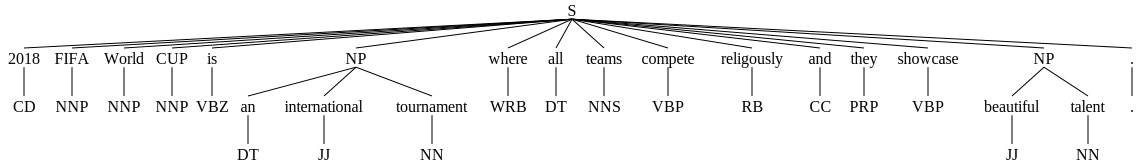

In [22]:
#Run this function on the file “FIFAWorldCup2018.txt” 

#Reading the file
file=open("FIFAWorldCup2018.txt",'r')
content=file.read()
file.close()

#Printing the tree 
PrintSyntaxTree(content)

### Objective 3

In [23]:
import re
def TextAfterRemovingPunctuations(string):
    s = re.sub(r'[^\w\s]','',string)
    return s

def TextAfterRemovingDigits(string):
    s=re.sub(r"(^|\W)\d+", "", string)
    return s

def AllCapitalizedWordsFromText(string):
    s = re.findall(r'(\b[A-Z]([a-z])*\b)',string)
    Capitalized=[]
    for word,lastcharacter in s:
        Capitalized.append(word)
    return Capitalized
    
def AllEmailsFromText(string):
    match = re.findall(r'[\w\.-]+@[\w\.-]+', string)
    return match

In [25]:
#Run all the above functions on the file “FIFAWorldCup2018.txt” and print the results.

#Reading the file
file=open("FIFAWorldCup2018.txt",'r')
content=file.read()
file.close()

print("After Removing Punctuation")
print (TextAfterRemovingPunctuations(content))
print ("\n")

print ("After Removing Digits")
print (TextAfterRemovingDigits(content))
print ("\n")

print ("Capitalized Words")
print (AllCapitalizedWordsFromText(content))
print ("\n")

print ("Emails")
print (AllEmailsFromText(content))
print ("\n")


After Removing Punctuation
2018 FIFA World CUP is an international tournament where all teams compete religously and they showcase beautiful talent It took place in Russia from 14 June to 15 July 2018 It was the first World Cup to be held in Eastern Europe and the 11th time that it had been held in Europe At an estimated cost of over 142 billion it was the most expensive World Cup It was also the first World Cup to use the video assistant referee  system 
The finals involved 32 teams of which 31 came through qualifying competitions while the host nation qualified automatically Of the 32 teams 20 had also appeared in the previous tournament in 2014 while both Iceland and Panama made their first appearances at a FIFA World Cup A total of 64 matches were played in 12 venues across 11 cities 
The final took place on 15 July at the Luzhniki Stadium in Moscow between France and Croatia France won the match 42 to claim their second World Cup title marking the fourth consecutive title won by a

### Objective 4

In [26]:
import nltk

#Phrases having Proper nouns followed by Verbs
def ChunkingVer1(sent):
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(sent))
    grammar=r"Phrases:{<NNP|NNPS>*<NNP|NNPS><VB|VBD|VBG|VBZ|VBP|VBN>*<VB|VBD|VBG|VBZ|VBP|VBN>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)
    return chunk_result


#Verb Phrases having Verbs followed by Adjectives
def ChunkingVer2(sent):
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(sent))
    grammar=r"VerbPhrases:{<VB|VBD|VBG|VBZ|VBP|VBN>*<VB|VBD|VBG|VBZ|VBP|VBN><JJ|JJR|JJS>*<JJ|JJR|JJS>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)
    return chunk_result

#Noun Phrases having Determiners followed by Nouns
def ChunkingVer3(sent):
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(sent))
    grammar=r"NounPhrases:{<DT><NN|NNS|NNP|NNPS>*<NN|NNS|NNP|NNPS>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)
    return chunk_result

#Verb Phrases having Verbs followed by Adverbs
def ChunkingVer4(sent):
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(sent))
    grammar=r"VerbPhrases:{<VB|VBD|VBG|VBZ|VBP|VBN>*<VB|VBD|VBG|VBZ|VBP|VBN><RB|RBR>*<RB|RBR>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)
    return chunk_result

#Phrases having Delimiter, Adjectives and Nouns in the respective order.
def ChunkingVer5(sent):
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(sent))
    grammar=r"Phrases:{<DT><JJ><NN|NNP|NNS|NNPS>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)
    return chunk_result

#Noun Phrases which having Nouns and Adjectives, terminated with Nouns. 
def ChunkingVer6(sent):
    sent_tokens=nltk.pos_tag(nltk.word_tokenize(sent))
    grammar=r"NounPhrases:{<NN|NNP|NNS|NNPS><JJ><NN|NNP|NNS|NNPS>}"
    chunk_parser=nltk.RegexpParser(grammar)
    chunk_result=chunk_parser.parse(sent_tokens)

    return chunk_result

In [27]:
#Run all the function for the first sentence in the file “FIFAWorldCup2018.txt” and print the results.

file=open("FIFAWorldCup2018.txt",'r')
content=file.read()
file.close()

first_sent=content.split(".")[0]+"."

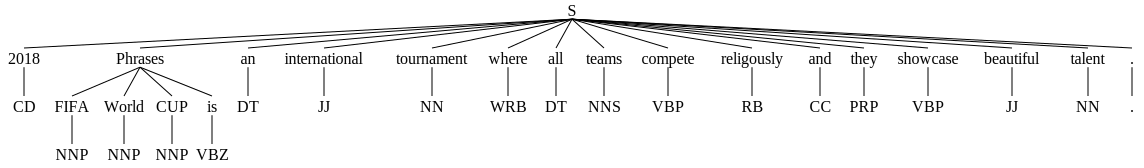

In [28]:
ChunkingVer1(first_sent)

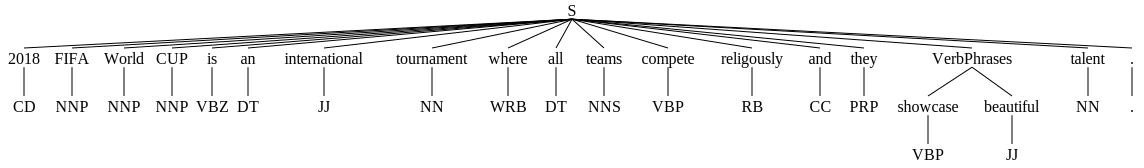

In [29]:
ChunkingVer2(first_sent)

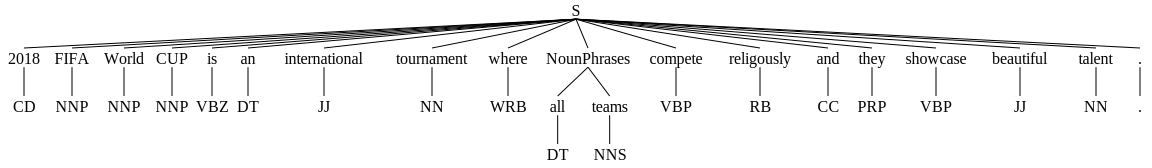

In [30]:
ChunkingVer3(first_sent)

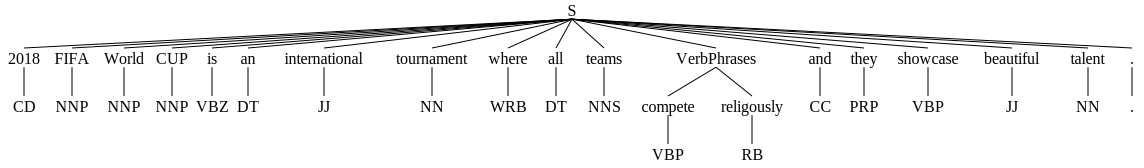

In [31]:
ChunkingVer4(first_sent)

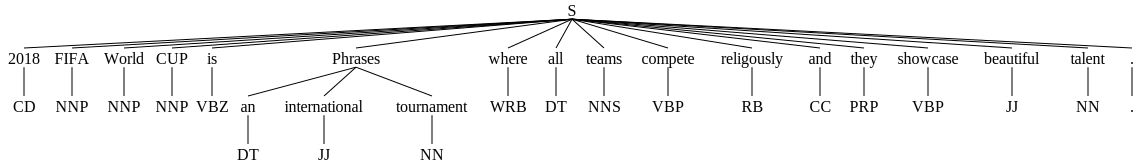

In [32]:
ChunkingVer5(first_sent)

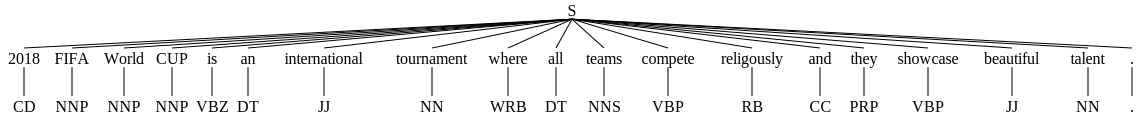

In [33]:
ChunkingVer6(first_sent)

# Objective 5

In [35]:
#2 most common Nouns
print ("Nouns:",GetNMostFrequentNouns(content,2))

#2 most common verbs
print ("Verbs:",GetNMostFrequentVerbs(content,2))

#2 most common prepositions
print ("Prepositions:",GetNMostFrequentPrepositions(content,2))

#2 most common delimiters
print ("Delimiters:",GetNMostFrequentDelimiters(content,2))

Nouns: ['world', 'cup']
Verbs: ['was', 'had']
Prepositions: ['of', 'in']
Delimiters: ['the', 'a']


In [36]:
from nltk.parse.generate import generate
grammar = nltk.CFG.fromstring("""
 S -> NP VP
 VP -> V NP | V NP PP
 V -> "had" | "was"
 NP -> DT N 
 DT -> "a" | "the" 
 N -> "world" | "cup"
 PP -> P NP
 P -> "of" | "in"
 """)

generated_grammar=[]
for sent in generate(grammar):
    generated_grammar.append(" ".join(sent))

In [37]:
#Saving in a file name "CGF.txt"

file=open('CFG.txt','a+')
for each in generated_grammar:
    file.write(each+"\n")
file.close()
    